In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('shopEasy.csv')
df.head()

,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,...,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,C10573,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,...,1,8,1500.0,236.764555,207.007715,0.00,6,New York,Premium,60
1,C16889,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,...,8,0,2000.0,89.741508,173.276205,0.00,6,Los Angeles,Premium,5
2,C12964,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,...,1,1,2500.0,234.271939,117.297542,0.25,12,New York,Student,21
3,C11171,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,...,0,1,5000.0,0.000000,NaN,0.00,12,Chicago,Premium,53
4,C17582,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,...,0,1,1500.0,118.438703,54.138711,0.00,6,New York,Premium,59


In [4]:
missing_values = df.isnull().sum()
print('Missing Values Summary:')
print(missing_values)

Missing Values Summary:
personId                      0
accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCosts             0
emergencyFunds                0
itemBuyFrequency              0
singleItemBuyFrequency        0
multipleItemBuyFrequency      0
emergencyUseFrequency         0
emergencyCount                0
itemCount                     0
maxSpendLimit                 1
monthlyPaid                   0
leastAmountPaid             313
paymentCompletionRate         0
accountLifespan               0
location                      0
accountType                   0
webUsage                      0
dtype: int64


In [7]:
df['maxSpendLimit'].fillna(df['maxSpendLimit'].mean(), inplace=True)

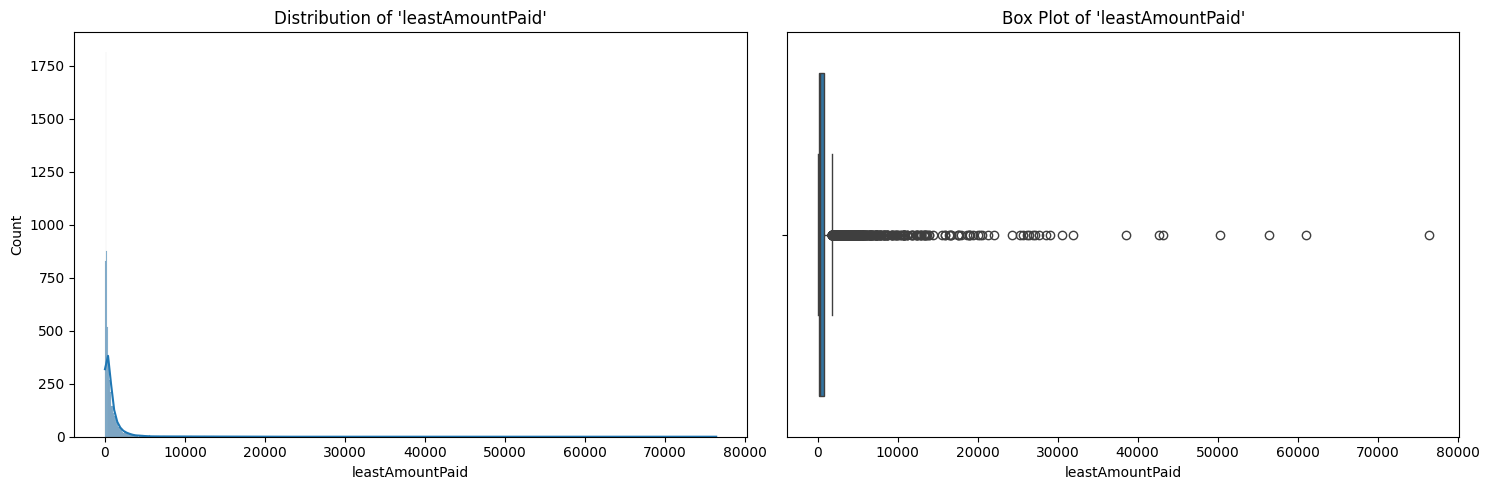

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Checking the distribution of 'leastAmountPaid' to decide between mean and median for imputation
sns.histplot(df['leastAmountPaid'].dropna(), kde=True, ax=axs[0])
axs[0].set_title("Distribution of 'leastAmountPaid'")

# Checking for outliers using a box plot
sns.boxplot(x=df['leastAmountPaid'], ax=axs[1])
axs[1].set_title("Box Plot of 'leastAmountPaid'")

plt.tight_layout()
plt.show()


In [9]:
# Implementing the adjusted strategy for handling null values in 'leastAmountPaid'

# 1. Substitute with 0 when 'itemCount' is 0
df.loc[df['itemCount'] == 0, 'leastAmountPaid'] = 0

# 2. Substitute with 'singleItemCosts' when 'itemCount' is 1
df.loc[df['itemCount'] == 1, 'leastAmountPaid'] = df['singleItemCosts']

# 3. Substitute with the median for the rest
median_leastAmountPaid = df['leastAmountPaid'].median()
df['leastAmountPaid'].fillna(median_leastAmountPaid, inplace=True)


In [8]:
# Verifying if all missing values are handled
missing_values_after_imputation = df.isnull().sum()

# Displaying the status of missing values after imputation
missing_values_after_imputation

personId                    0
accountTotal                0
frequencyIndex              0
itemCosts                   0
singleItemCosts             0
multipleItemCosts           0
emergencyFunds              0
itemBuyFrequency            0
singleItemBuyFrequency      0
multipleItemBuyFrequency    0
emergencyUseFrequency       0
emergencyCount              0
itemCount                   0
maxSpendLimit               0
monthlyPaid                 0
leastAmountPaid             0
paymentCompletionRate       0
accountLifespan             0
location                    0
accountType                 0
webUsage                    0
dtype: int64

In [17]:
df.head()

,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,...,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,C10573,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,...,1,8,1500.0,236.764555,207.007715,0.00,6,New York,Premium,60
1,C16889,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,...,8,0,2000.0,89.741508,173.276205,0.00,6,Los Angeles,Premium,5
2,C12964,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,...,1,1,2500.0,234.271939,117.297542,0.25,12,New York,Student,21
3,C11171,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,...,0,1,5000.0,0.000000,312.343947,0.00,12,Chicago,Premium,53
4,C17582,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,...,0,1,1500.0,118.438703,54.138711,0.00,6,New York,Premium,59


# Univariate Analysis

Index(['accountTotal', 'frequencyIndex', 'itemCosts', 'singleItemCosts',
       'multipleItemCosts', 'emergencyFunds', 'itemBuyFrequency',
       'singleItemBuyFrequency', 'multipleItemBuyFrequency',
       'emergencyUseFrequency', 'emergencyCount', 'itemCount', 'maxSpendLimit',
       'monthlyPaid', 'leastAmountPaid', 'paymentCompletionRate',
       'accountLifespan', 'webUsage'],
      dtype='object')


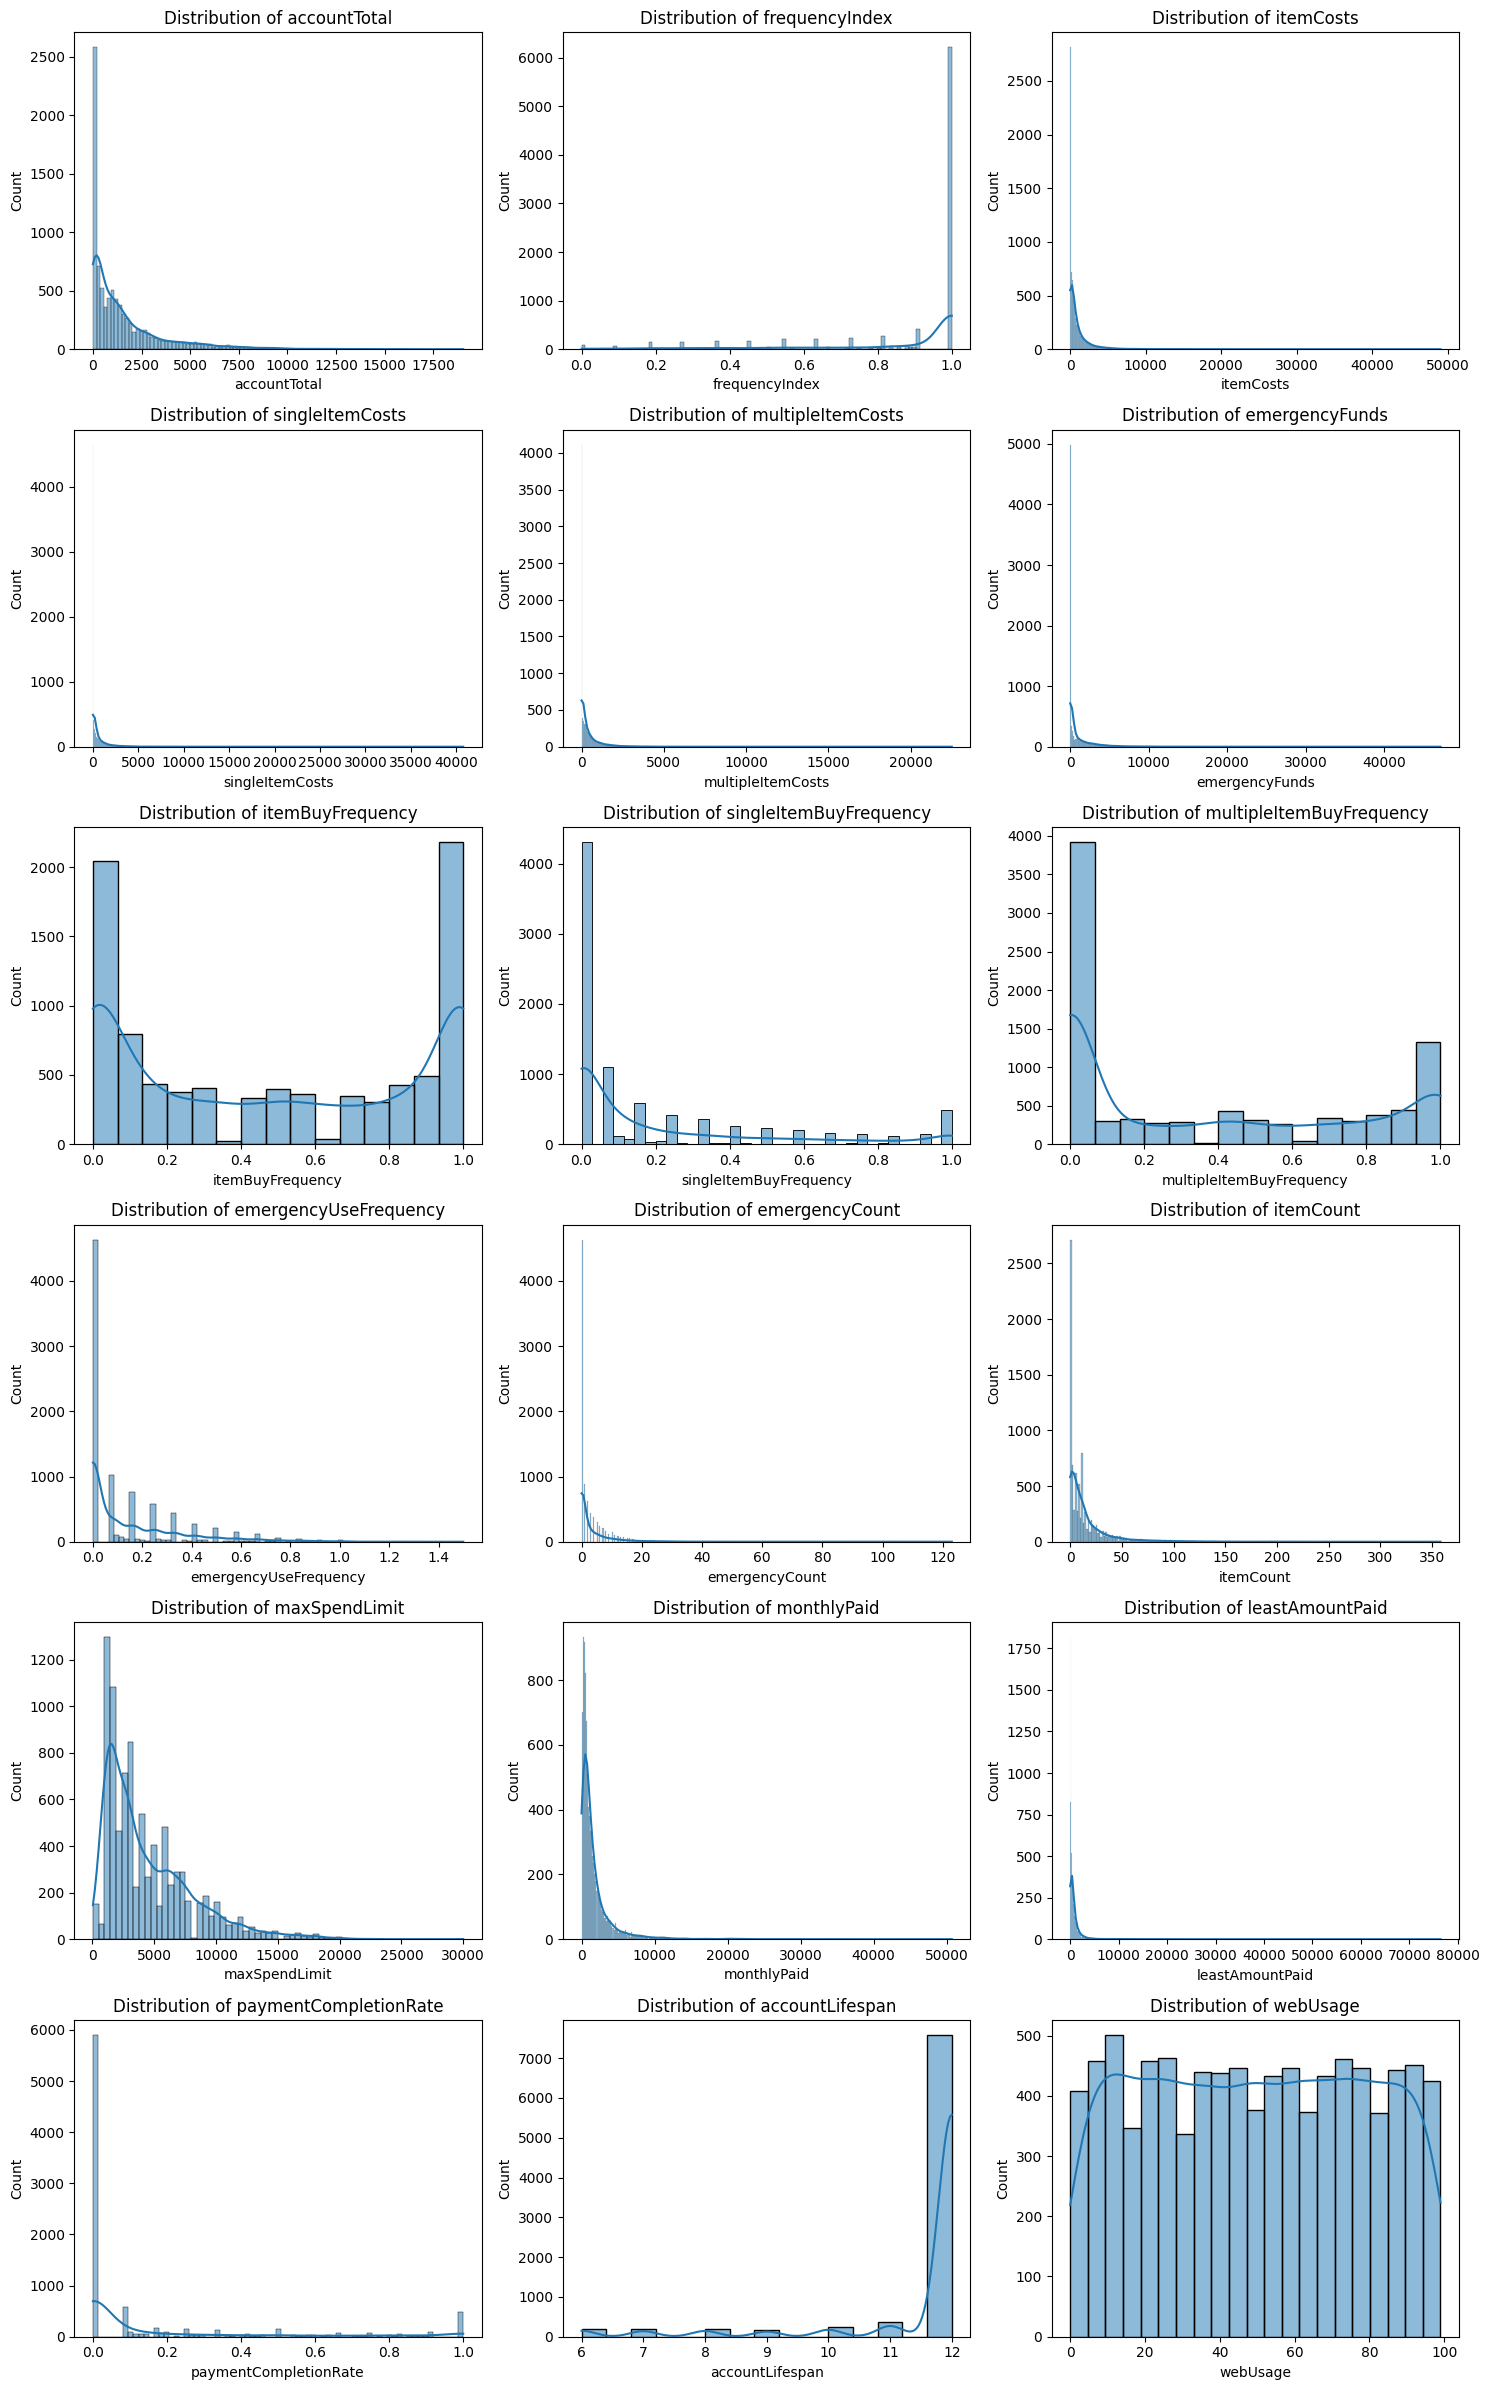

In [9]:
# Selecting numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

print(numerical_features)

# Determine the number of rows/columns for the subplot grid
num_features = len(numerical_features)
ncols = 3
nrows = num_features // ncols + (num_features % ncols > 0)

# Creating subplots
plt.figure(figsize=(15, nrows * 4))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

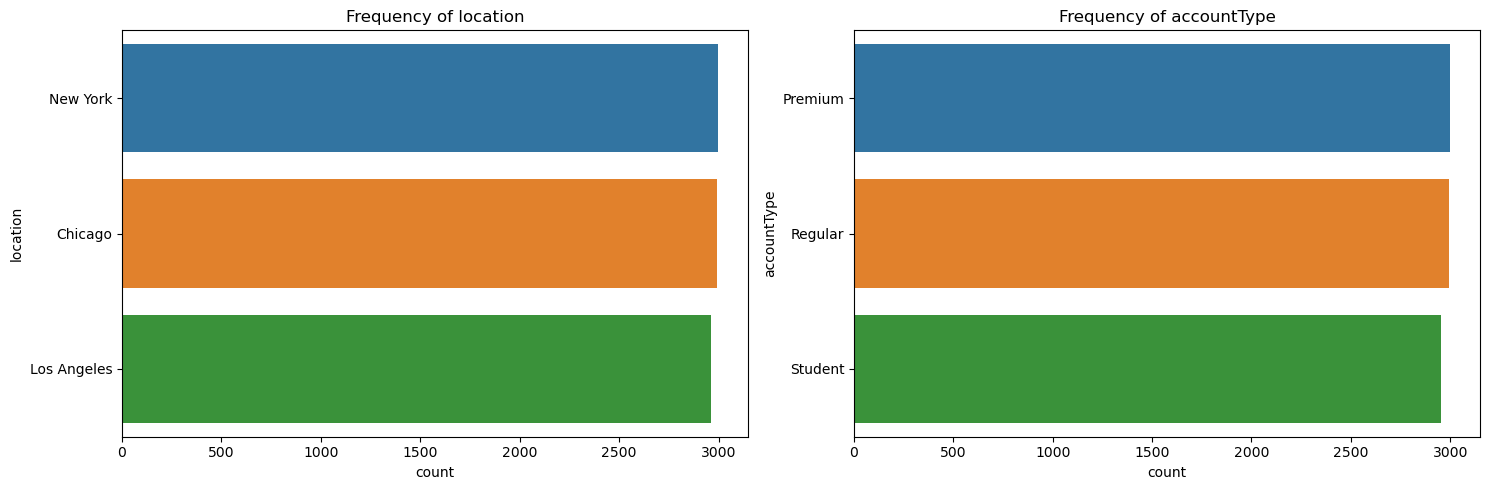

In [14]:
categorical_features = ['location', 'accountType']  # Specify the categorical features you want to plot

# Determine the number of rows/columns for the subplot grid
ncols = 2
nrows = len(categorical_features) // ncols + (len(categorical_features) % ncols > 0)

# Creating subplots for the selected categorical variables
plt.figure(figsize=(15, nrows * 5))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Frequency of {column}')
    
plt.tight_layout()
plt.show()


c:\Users\Utente\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

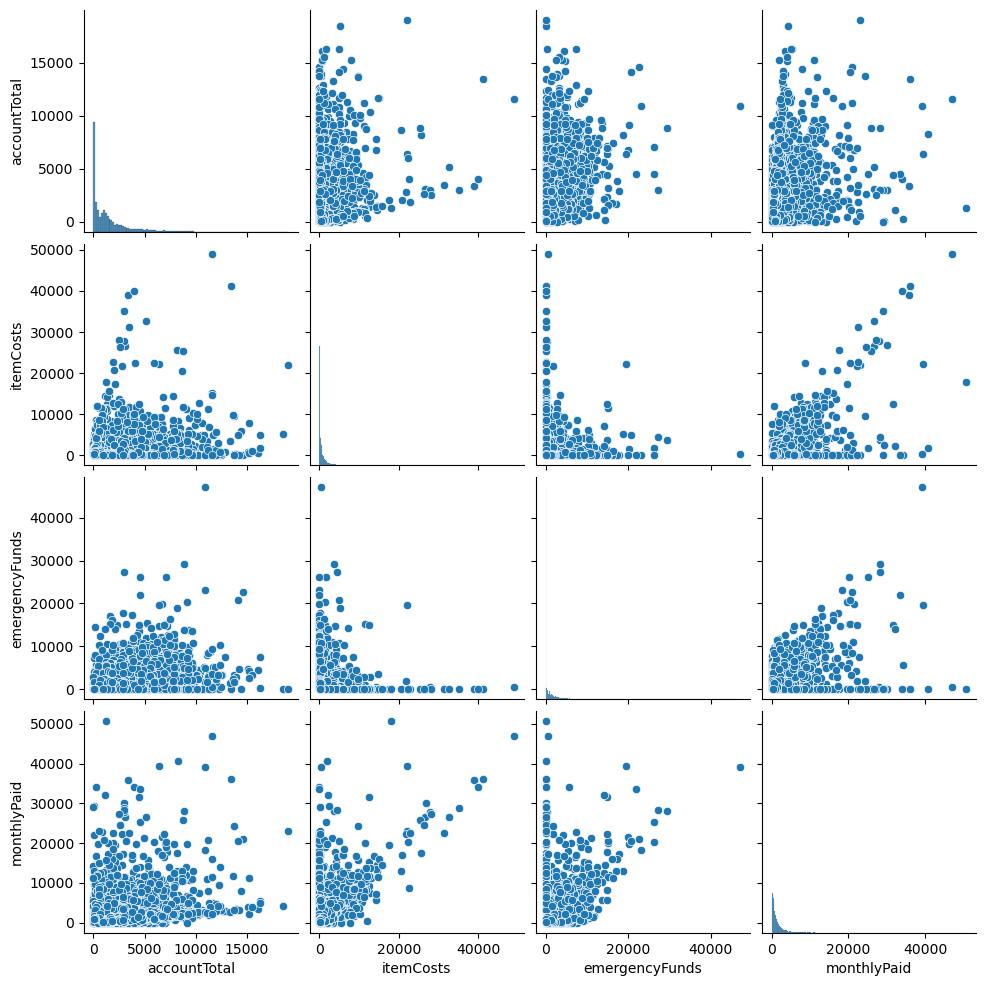

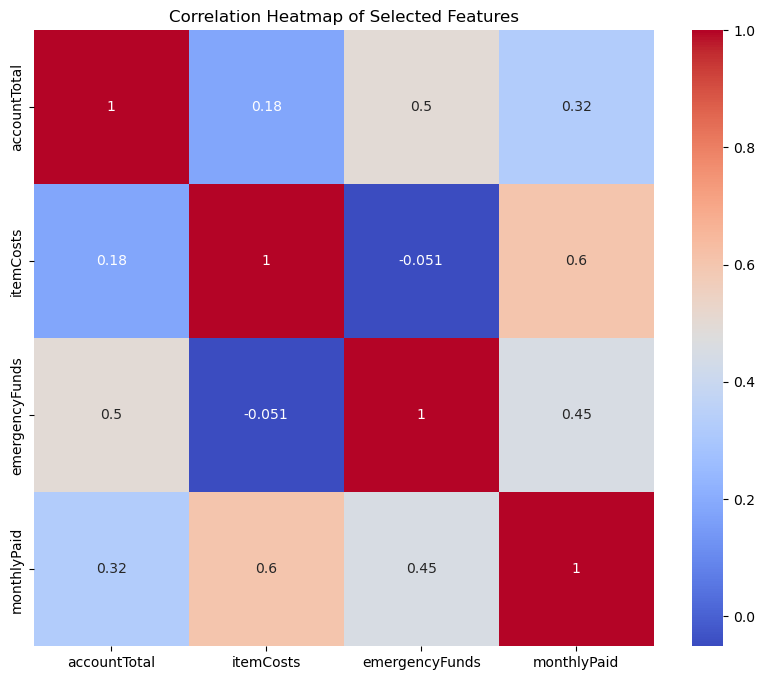

In [18]:
selected_features = ['accountTotal', 'itemCosts', 'emergencyFunds', 'monthlyPaid']

# Create a pairplot for the selected features
plt.figure(figsize=(10, 10))
sns.pairplot(df[selected_features])
plt.show()

# Create a correlation heatmap for the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

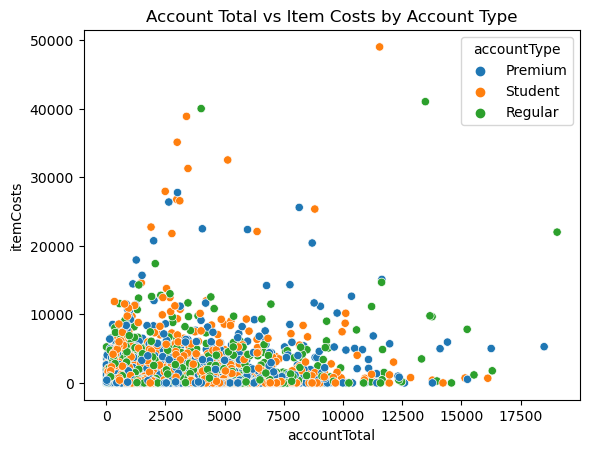

In [19]:
# Explore relationships between variables
sns.scatterplot(x='accountTotal', y='itemCosts', hue='accountType', data=df)
plt.title('Account Total vs Item Costs by Account Type')
plt.show()
